# Complejidad de datos

- Samuel Patiño Flores

In [73]:
%pip install pandas matplotlib imbalanced-learn ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\zekoo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [74]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Convertir los datos a un DataFrame de pandas
data = pd.read_csv('adult.data', header=None, na_values=' ?', 
                   names=['age', 'workclass', 'fnlwgt', 'education', 
                          'education-num', 'marital-status', 'occupation', 
                          'relationship', 'race', 'sex', 
                          'capital-gain', 'capital-loss', 
                          'hours-per-week', 'native-country', 'class'])

data_org = pd.read_csv('adult.data', header=None, na_values=' ?', 
                   names=['age', 'workclass', 'fnlwgt', 'education', 
                          'education-num', 'marital-status', 'occupation', 
                          'relationship', 'race', 'sex', 
                          'capital-gain', 'capital-loss', 
                          'hours-per-week', 'native-country', 'class'])




class
<=50K    24720
>50K      7841
Name: count, dtype: int64


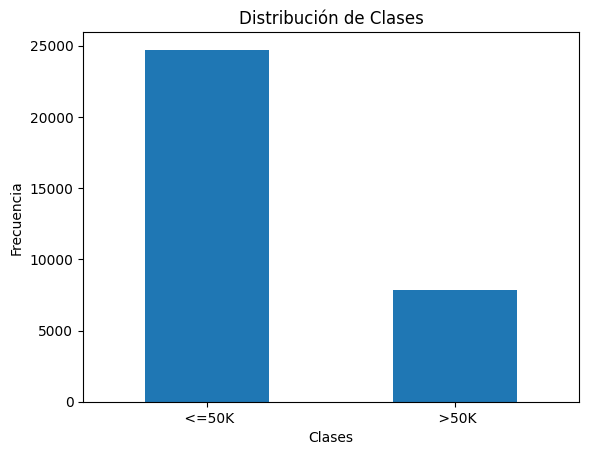

In [75]:
class_distribution = data['class'].value_counts()

print(class_distribution)

class_distribution.plot(kind='bar')
plt.title('Distribución de Clases')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)  # Rotar etiquetas para mejor legibilidad
plt.show()


In [76]:
# Imputar valores perdidos en columnas categóricas con la moda
for column in data.select_dtypes(include=['object']).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)


C:\Users\zekoo\AppData\Local\Temp\ipykernel_1972\1399622579.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)


## Nulos antes de tratarlo

In [77]:
print(data_org.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64


## Nulos despues de tratarlo

In [78]:
print(data_org.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64


## Aplicacion de SMOTE

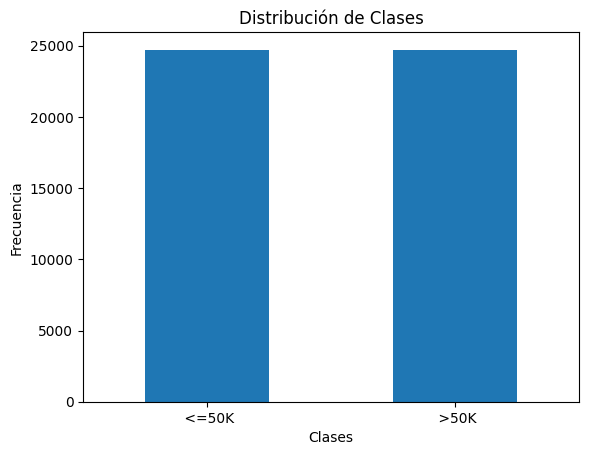

In [79]:
# Separar características y variable objetivo
X = data.drop('class', axis=1)
y = data['class']

# Convertir variables categóricas en variables dummy (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combinar las características y la variable objetivo en un nuevo DataFrame
data_balanced = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='class')], axis=1)


class_distribution = data_balanced['class'].value_counts()
class_distribution.plot(kind='bar')
plt.title('Distribución de Clases')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)  # Rotar etiquetas para mejor legibilidad
plt.show()

In [80]:
# Este es el DataFrame que tiene las variables dummies (después de aplicar SMOTE)
X_resampled_dummies = pd.DataFrame(X_resampled, columns=X.columns)

# Aquí estamos haciendo una lista de las variables categóricas originales que fueron convertidas
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 
                       'relationship', 'race', 'sex', 'native-country']

# Revertir cada conjunto de variables dummies a sus categorías originales
for col in categorical_columns:
    # Encontrar todas las columnas dummy que comienzan con el nombre de la variable original
    dummy_cols = [dummy for dummy in X_resampled_dummies.columns if dummy.startswith(col)]
    
    # Usar idxmax para obtener la columna con el valor 1 (que representa la categoría original)
    X_resampled_dummies[col] = X_resampled_dummies[dummy_cols].idxmax(axis=1).apply(lambda x: x.split('_', 1)[-1])
    
    # Eliminar las columnas dummy
    X_resampled_dummies.drop(columns=dummy_cols, inplace=True)

# Ahora, 'X_resampled_dummies' contiene las categorías originales en lugar de las columnas dummy
data_final = pd.concat([X_resampled_dummies, pd.Series(y_resampled, name='class')], axis=1)

# Exportar a un archivo CSV
data_final.to_csv('adult_data_balanced.csv', index=False)